# K-Means Clustering

In [1]:
"""
Created on Sun Jul 25 14:41:06 2021

@author: Jos Vilier
Kmeans clustering for bag of words model (PCA)
"""
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Import principal components

In [3]:
data = pd.read_csv("Data/PCA/PCA_new_transformed_features.csv").set_index("Unnamed: 0", drop = True) # read PCA 
index = pd.read_csv("Data/Bag of words/bow_filtered.csv")["Unnamed: 0"] # read index
data.index = index # bind index to data

# normalize data
data_unscaled = np.asarray(data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_unscaled)

Import return data

In [4]:
returns = pd.read_csv("Data/Returns/returns_modeling.csv") # read return data
returns['firm_year'] = returns['Ticker'] + '_' + (returns['Year']-1).astype(str) # store next year's return

Calculate and plot residuals

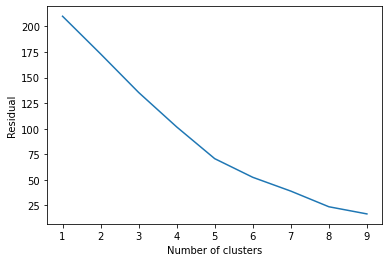

In [5]:
# calculate residuals as function of number of clusters
residuals = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data_scaled)
    residuals.append(kmeans.inertia_)

# plot residuals
plt.plot(range(1,10), residuals)
plt.xlabel("Number of clusters")
plt.ylabel("Residual")
plt.savefig("kmeans.png")
plt.show()

Perform k-means clustering

In [7]:
# select 3 cluster centers
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_scaled)
print(kmeans.cluster_centers_.round(2))

# add return data to pca data
data['label'] = kmeans.labels_
data['firm_year'] = data.index

# calculate average return per cluster
combined_data = pd.merge(data, returns[['firm_year', 'Excess_Return']], on = 'firm_year')
grp_by_label = combined_data.loc[:,['Excess_Return','label']].groupby('label').mean().reset_index()
display(grp_by_label)

[[ 3.97 -1.19  0.39 -1.07  0.02]
 [-0.47 -0.97  0.18  0.25 -0.05]
 [ 0.    0.82 -0.16 -0.09  0.04]]


,label,Excess_Return
